<a href="https://colab.research.google.com/github/payamfirouzfar/keras/blob/main/kerasimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device("cuda" )#if torch.cuda.is_available() else "cpu") 
#device

In [3]:
# hyperparameters
input_size = 784
hidden_size = 100
num_class  = 10
num_epochs = 2
batch_size = 100
learning_rate = 1e-3


In [4]:
#mnist
train_dataset = torchvision.datasets.MNIST(root = "./data" , train = True , 
                                           transform = transforms.ToTensor() ,
                                           download = True)
test_dataset = torchvision.datasets.MNIST(root = "./data" , train = False , 
                                           transform = transforms.ToTensor() )
train_loader = torch.utils.data.DataLoader(dataset = train_dataset , batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset , batch_size = batch_size,
                                           shuffle = False)
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape , labels.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


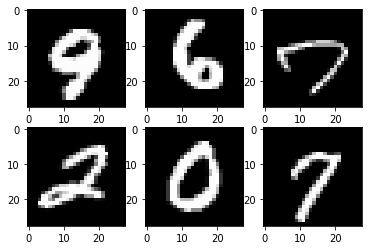

In [5]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap = "gray")
plt.show()

In [6]:
class NeuralNet(nn.Module):
  def __init__(self , input_size , hidden_size , num_class):
    super(NeuralNet , self).__init__()
    self.l1 = nn.Linear(input_size  , hidden_size)
    self.relu = nn.ReLU()
    self.l3 = nn.Linear(hidden_size , 703)
    self.relu2 = nn.ReLU()
    self.l6 = nn.Linear(703 , 591)
    self.relu5 = nn.ReLU()
    self.l4 = nn.Linear(591 , 479)
    self.relu3 = nn.ReLU()
    self.l5 = nn.Linear(479 , 386)
    self.relu4 = nn.ReLU()
    self.l2 = nn.Linear(386 , 261)
    self.relu7 = nn.ReLU()
    self.l7 = nn.Linear(261 , num_class)


  def forward(self , x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu2(out)
    out = self.l6(out)
    out = self.relu5(out)
    out = self.l4(out)
    out = self.relu3(out)
    out = self.l5(out)
    out = self.relu4(out)
    out = self.l2(out)
    out = self.relu7(out)
    out = self.l7(out)
    return(out)

model = NeuralNet(input_size , hidden_size , num_class)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images , labels) in enumerate(train_loader):
    images = images.reshape(-1 , 28*28) #-1 will calculate the first dimension automatically
    labels = labels#to device will send it into GPU

    outputs = model(images)  #we give the model x that is images for forward
    loss = criterion(outputs , labels) #the entropy between outputs and labels

    optimizer.zero_grad()  #put the gradient zero 
    loss.backward()   #backpro
    optimizer.step()  #update parameters for us

    if (i+1) % 100 ==0:
      print(f"epoch {epoch+1} / {num_epochs} , step{i+1} / {n_total_steps} , loss = {loss.item():.4f}")

#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images , labels in test_loader:
    #a = images.reshape(-1 , 28*28).to('cuda:0')
    images = images.reshape(-1 , 28*28)#-1 will calculate the first dimension automatically
    #b = labels.to('cuda:0')
    labels = labels
    outputs = model(images)
    #this below torch.max will return value and index we want index
    _ , predictions = torch.max(outputs , 1)
    n_samples += labels.shape[0] # will return the labels and it's batch
    n_correct += (predictions == labels).sum().item() # item will return complete value
  acc = 100.0 * n_correct / n_samples
  print(f"accuracy = {acc}")





epoch 1 / 2 , step100 / 600 , loss = 0.5477
epoch 1 / 2 , step200 / 600 , loss = 0.4784
epoch 1 / 2 , step300 / 600 , loss = 0.3786
epoch 1 / 2 , step400 / 600 , loss = 0.3098
epoch 1 / 2 , step500 / 600 , loss = 0.0972
epoch 1 / 2 , step600 / 600 , loss = 0.2299
epoch 2 / 2 , step100 / 600 , loss = 0.2174
epoch 2 / 2 , step200 / 600 , loss = 0.0973
epoch 2 / 2 , step300 / 600 , loss = 0.1550
epoch 2 / 2 , step400 / 600 , loss = 0.0683
epoch 2 / 2 , step500 / 600 , loss = 0.0496
epoch 2 / 2 , step600 / 600 , loss = 0.0409
accuracy = 95.6
